# Udemy First Exercise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv("1.04. Real-life example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

# Processing Data

In [5]:
data_w_no_na = raw_data.dropna(axis=0)

In [6]:
data_w_no_na.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [7]:
data_w_no_na.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
data_w_no_na = data_w_no_na.drop('Model', axis=1)

In [9]:
data_w_no_na.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


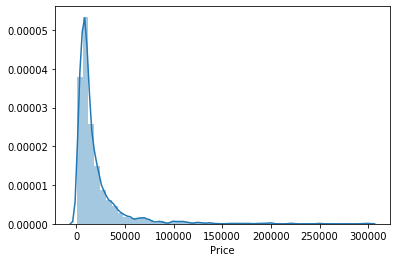

In [10]:
sns.distplot(data_w_no_na['Price'])

In [11]:
q = data_w_no_na['Price'].quantile(0.99)

In [12]:
data_1 = data_w_no_na[data_w_no_na['Price'] < q]

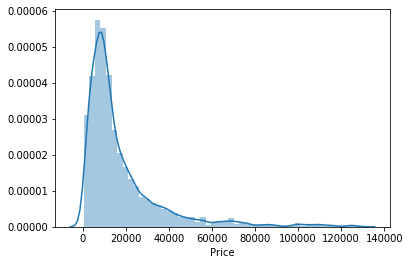

In [13]:
sns.distplot(data_1['Price'])

In [20]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

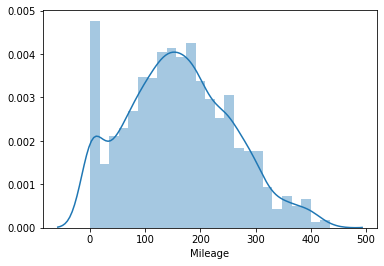

In [21]:
sns.distplot(data_2['Mileage'])

In [22]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

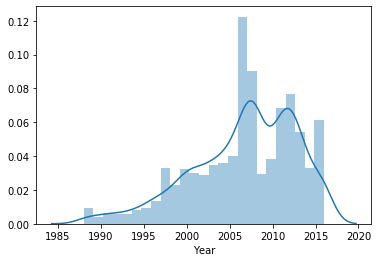

In [23]:
sns.distplot(data_3['Year'])

In [24]:
data_4 = data_3[data_3['EngineV']<6.5]

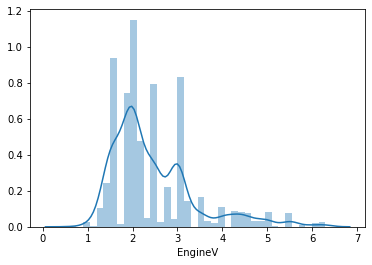

In [25]:
sns.distplot(data_4['EngineV'])

In [26]:
cleaned_data = data_4.reset_index(drop=True)

In [32]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Price and Engine Size')

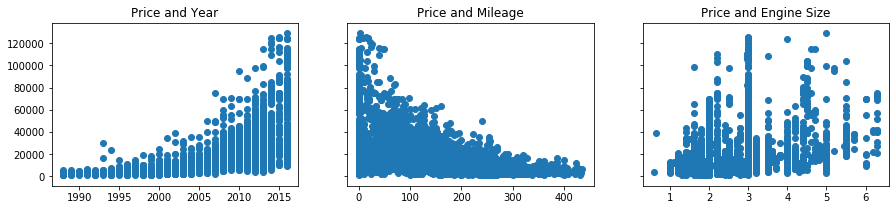

In [36]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(cleaned_data['Year'], cleaned_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['Mileage'], cleaned_data['Price'])
ax2.set_title('Price and Mileage')
ax3.scatter(cleaned_data['EngineV'], cleaned_data['Price'])
ax3.set_title('Price and Engine Size')

# Multicolinearity

In [27]:
log_price = np.log(cleaned_data['Price'])
cleaned_data['log_price'] = log_price

In [30]:
cleaned_data.drop('Price', axis=1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [31]:
cleaned_data.describe()

,Price,Mileage,EngineV,Year,log_price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,9.415703
std,19085.855165,95.633291,0.949366,6.103870,0.876616
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7200.000000,91.000000,1.800000,2003.000000,8.881836
50%,11700.000000,157.000000,2.200000,2008.000000,9.367344
75%,21700.000000,225.000000,3.000000,2012.000000,9.985068
max,129222.000000,435.000000,6.300000,2016.000000,11.769287


Text(0.5, 1.0, 'Price and Engine Size')

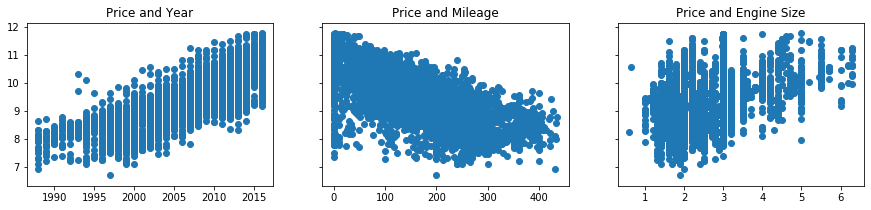

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(cleaned_data['Year'], cleaned_data['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['Mileage'], cleaned_data['log_price'])
ax2.set_title('Price and Mileage')
ax3.scatter(cleaned_data['EngineV'], cleaned_data['log_price'])
ax3.set_title('Price and Engine Size')

In [40]:
cleaned_data.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'],
      dtype='object')

# Multicolinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [ variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] =variables.columns

In [48]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [53]:
data_with_no_collinearity = cleaned_data.drop(['Year', 'Price'], axis=1)

In [54]:
data_with_dummies = pd.get_dummies(data_with_no_collinearity, drop_first=True)

In [55]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [56]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [58]:
cols = ['log_price', 'Mileage', 'EngineV',  'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [63]:
data_preprocessed = data_with_dummies[cols]

In [64]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Testinng 

In [66]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price', axis=1)

# Scale Data

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [83]:
from sklearn.linear_model import LinearRegression


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [84]:
reg = LinearRegression()

In [85]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_hat = reg.predict(X_train)

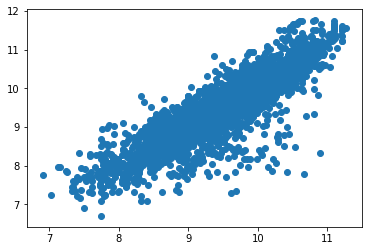

In [89]:
plt.scatter(y_hat, y_train)